<a href="https://colab.research.google.com/github/datajcthemax/playdata/blob/main/day12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12번째 이야기
- 판다스 데이터 프레임 심화 및 활용 사례
- sklearn 데이터셋 받아오기 실습
- 판다스 각 기능을 이해하고 자신의 목적에 맞게 적용하는 실력 갖추기

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
# titanic 데이터 train, test 중 
titanic = pd.read_csv('/content/drive/MyDrive/datas/train.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic.shape

(891, 12)

In [ ]:
# 결측치가 많은 컬럼 자체를 삭제
titanic.drop('Cabin',axis = 1, inplace=True)
# titanic = titanic.drop('Cabin',axis = 1)

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# 결측치를 다른 값으로 대체 (age의 중앙값)
age_median = titanic['Age'].median()
age_median

28.0

In [ ]:
age_mode = titanic['Age'].mode() # 최빈값
age_mean = titanic['Age'].mean() # 평균값

In [ ]:
age_mode, age_mean

(0    24.0
 Name: Age, dtype: float64,
 29.69911764705882)

In [ ]:
titanic['Age'].fillna(age_median, inplace=True)

In [ ]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# Embarked에서 null 레코드는 삭제(행)
titanic.dropna(axis = 0, inplace=True)

In [ ]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# house 데이터를 가지고
# 결측치가 몇개인지, 어느 컬럼에서 나오는지 확인
# 컬럼을 지워도 보고
# 행을 지워도 보고
# 다른 값으로 대체

In [ ]:
house = pd.read_csv('/content/drive/MyDrive/datas/house_price.csv')

In [ ]:
house.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4505 non-null   object
 1   규모구분     4505 non-null   object
 2   연도       4505 non-null   int64 
 3   월        4505 non-null   int64 
 4   분양가격(㎡)  4210 non-null   object
dtypes: int64(2), object(3)
memory usage: 176.1+ KB


In [ ]:
house.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    295
dtype: int64

In [ ]:
house_col_remove = house.copy()

In [ ]:
house_col_remove.drop('분양가격(㎡)', axis=1, inplace=True)

In [ ]:
house_col_remove

,지역명,규모구분,연도,월
0,서울,전체,2015,10
1,서울,전용면적 60㎡이하,2015,10
2,서울,전용면적 60㎡초과 85㎡이하,2015,10
3,서울,전용면적 85㎡초과 102㎡이하,2015,10
4,서울,전용면적 102㎡초과,2015,10
...,...,...,...,...
4500,제주,전체,2020,2
4501,제주,전용면적 60㎡이하,2020,2
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2


In [ ]:
house_row_remove = house.copy()

In [ ]:
house_row_remove.dropna(axis=0, inplace=True)

In [ ]:
house_row_remove.isna().sum()

지역명        0
규모구분       0
연도         0
월          0
분양가격(㎡)    0
dtype: int64

In [ ]:
# 분양가격의 평균으로 대체?!
house_rp = house.copy()

In [ ]:
house_rp['분양가격(㎡)'] = house_rp['분양가격(㎡)'].mean()

TypeError: ignored

In [ ]:
mode = house_rp['분양가격(㎡)'].mode()
# house_rp['분양가격(㎡)'].fillna(10000)

In [ ]:
mode.values.item()

'2221'

In [ ]:
house_rp['분양가격(㎡)'].fillna(mode.values.item(), inplace=True)
house_rp.isna().sum()

지역명        0
규모구분       0
연도         0
월          0
분양가격(㎡)    0
dtype: int64

In [ ]:
# 데이터의 차이
titanic_train = pd.read_csv('/content/drive/MyDrive/datas/train.csv')
titanic_test = pd.read_csv('/content/drive/MyDrive/datas/test.csv')

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# train, test의 컬럼에 차이가 있는데 어떻게 하면 두 데이터를 합칠 수 있을까
# 11시에 같이 공부해볼게요

In [ ]:
titanic_test['Age'].mean()

30.272590361445783

In [ ]:
titanic_train.drop('Survived', axis=1, inplace=True)

In [ ]:
titanic_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# 두 데이터를 합치기
titanic_train_1 = titanic_train.copy()
titanic_test_1 = titanic_test.copy()

In [ ]:
titanic_1 = pd.concat([titanic_train_1,titanic_test_1])
titanic_1.shape

(1309, 11)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/datas/korea-star-1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/datas/korea-star-2.csv')

In [ ]:
df1.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,인기지수
0,아이린,레드벨벳,SM,여자,1991-03-29,160.0,A,8256324
1,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027
2,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
3,민현,NaN,플레디스,남자,1995-08-09,182.3,O,4989792
4,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615


In [ ]:
df2.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,인기지수
0,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654
1,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137
2,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,4925442
3,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
4,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,7208335


In [ ]:
customer_data = {'customer_id':[1,2,3],
                 'name':['Alice', 'Bob', 'Charlie']
                 }
customer_df = pd.DataFrame(customer_data)

In [ ]:
customer_df

,customer_id,name
0,1,Alice
1,2,Bob
2,3,Charlie


In [ ]:
order_data = {'order_id':[11,12,13],
              'customer_id':[3,1,2],
              'product':['TV','NoteBook','Car']
              }
order_df = pd.DataFrame(order_data)
order_df

,order_id,customer_id,product
0,11,3,TV
1,12,1,NoteBook
2,13,2,Car


In [ ]:
merged_df = pd.merge(customer_df, order_df, on='customer_id')
merged_df

,customer_id,name,order_id,product
0,1,Alice,12,NoteBook
1,2,Bob,13,Car
2,3,Charlie,11,TV


In [ ]:
df2['소속사'].unique()

array(['플레디스', '빅히트', '커넥트', 'RBW', '스타크루이엔티', 'SM'], dtype=object)

In [ ]:
company_data = {'name':['플레디스', '빅히트', '커넥트', 'RBW', '스타크루이엔티', 'SM'],
                'address': ['서울','대전','대구','부산','제주', '독도' ]
                }

In [ ]:
company_data = {'name':['플레디스', '빅히트', '커넥트', 'RBW', '스타크루이엔티', 'SM'],
                'address': ['서울','대전','대구','부산','제주', '독도' ]
                }
company_df = pd.DataFrame(company_data)
company_df.columns = ['소속사','주소']

# korea star 1, 2 데이터를 합치고, company df와 결합하기

In [ ]:
df1 = df1.copy()
df2 = df2.copy()

In [ ]:
df3 = pd.concat([df1,df2])

In [ ]:
df3

,이름,그룹,소속사,성별,생년월일,키,혈액형,인기지수
0,아이린,레드벨벳,SM,여자,1991-03-29,160.0,A,8256324
1,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027
2,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
3,민현,NaN,플레디스,남자,1995-08-09,182.3,O,4989792
4,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615
5,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
6,윤아,소녀시대,SM,여자,1989-03-09,NaN,A,3918661
0,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654
1,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137
2,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,4925442


In [ ]:
df4 = pd.concat([df3,company_df])

In [ ]:
df4

,이름,그룹,소속사,성별,생년월일,키,혈액형,인기지수,주소
0,아이린,레드벨벳,SM,여자,1991-03-29,160.0,A,8256324.0,NaN
1,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027.0,NaN
2,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501.0,NaN
3,민현,NaN,플레디스,남자,1995-08-09,182.3,O,4989792.0,NaN
4,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615.0,NaN
5,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308.0,NaN
6,윤아,소녀시대,SM,여자,1989-03-09,NaN,A,3918661.0,NaN
0,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654.0,NaN
1,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137.0,NaN
2,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,4925442.0,NaN


In [ ]:
star_cc = pd.concat([df1,df2])
star_comapny_df = pd.merge(star_cc,company_df,on='소속사')
star_comapny_df

,이름,그룹,소속사,성별,생년월일,키,혈액형,인기지수,주소
0,아이린,레드벨벳,SM,여자,1991-03-29,160.0,A,8256324,독도
1,윤아,소녀시대,SM,여자,1989-03-09,NaN,A,3918661,독도
2,슬기,레드벨벳,SM,여자,1994-02-10,161.0,A,5021452,독도
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501,대전
4,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308,대전
5,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,4925442,대전
6,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,7208335,대전
7,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260,대전
8,민현,NaN,플레디스,남자,1995-08-09,182.3,O,4989792,서울
9,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654,서울


# apply

In [ ]:
data = pd.DataFrame({
    'A':[1,2,3],
    'B':[4,5,6],
    'C':[7,8,9]
})

In [ ]:
data

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
data.apply(lambda x:x.mean())

A    2.0
B    5.0
C    8.0
dtype: float64

In [ ]:
data.apply(lambda x:x.mean(), axis=0)

A    2.0
B    5.0
C    8.0
dtype: float64

In [ ]:
data.apply(lambda x:x.mean(), axis=1)

0    4.0
1    5.0
2    6.0
dtype: float64

In [ ]:
data

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
data['AVG'] = data.apply(lambda x:x.mean(), axis=1)

In [ ]:
data

,A,B,C,AVG
0,1,4,7,4.0
1,2,5,8,5.0
2,3,6,9,6.0


In [ ]:
def tmp_fn(x):
  return str(x)

In [ ]:
data['tmp'] = data.apply(tmp_fn, axis=1)

In [ ]:
data

,A,B,C,AVG,tmp
0,1,4,7,4.0,A 1.0\nB 4.0\nC 7.0\nAVG 4.0...
1,2,5,8,5.0,A 2.0\nB 5.0\nC 8.0\nAVG 5.0...
2,3,6,9,6.0,A 3.0\nB 6.0\nC 9.0\nAVG 6.0...


In [ ]:
# 성적 데이터 만들기
grades = pd.DataFrame(
    {
        'name':['a','b','c','d'],
        'score':[70,88,65,91]
    }
)
grades

,name,score
0,a,70
1,b,88
2,c,65
3,d,91


In [ ]:
def score_to_grade(score):
  if score>=90:
    return 'A'
  elif score>=80:
    return 'B'
  elif score>=70:
    return 'C'
  else:
    return 'D'

In [ ]:
grades['grade'] = grades['score'].apply(score_to_grade)

In [ ]:
grades

,name,score,grade
0,a,70,C
1,b,88,B
2,c,65,D
3,d,91,A


# house 데이터에서 분양가격을 숫자로 변환

In [ ]:
house['분양가격(㎡)'].astype(int)

ValueError: ignored

In [ ]:
house.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    295
dtype: int64

In [ ]:
house.shape

(4505, 5)

In [ ]:
295/4505

0.06548279689234185

In [ ]:
# 삭제
house.dropna(axis=0, inplace=True)
house.isna().sum()

지역명        0
규모구분       0
연도         0
월          0
분양가격(㎡)    0
dtype: int64

In [ ]:
house['분양가격(㎡)'].astype(int)

ValueError: ignored

In [ ]:
# apply를 적용해서 진행
def to_int(x):
  x= x.replace(' ','')
  x= x.replace(',','')
  x= x.replace('-','')
  # print(x)
  if x=='':
    return 0
  return int(x)

In [ ]:
house['price'] = house['분양가격(㎡)'].apply(to_int)

In [ ]:
house['price'].mean()

3240.2275534441806

In [ ]:
house['price'].median()

2881.5

In [ ]:
house[house['price']==0].index

Int64Index([  28,   29,   34,   81,  113,  114,  119,  166,  198,  199,  204,
             251,  283,  284,  289,  336, 3683, 3686, 3688, 3690, 3691, 3692,
            3693, 3694, 3696],
           dtype='int64')

In [ ]:
house.drop(house[house['price']==0].index, inplace=True)

In [ ]:
house['price'].mean(), house['price'].median(), house['price'].var()

(3259.5837514934287, 2887.0, 1657049.7373076247)

# 자신만의 방법을 고민해서 분양가격을 숫자로 바꾸는 것을 시도해 봅시다.
# 각 지역, 규모, 연도에 따라서 부동산 가격이 어떻게 변화되었는지 분석(통계를 이용) -> 나름의 가설을 만들어 보자

In [1]:
house

NameError: ignored

In [2]:
house[(house.연도==2015)&(house.월==10)&(house.지역명=='서울')]['price'].mean()

NameError: ignored

In [3]:
house = pd.read_csv('/content/drive/MyDrive/datas/house_price.csv')

NameError: ignored

In [4]:
house[(house.연도==2015)&(house.월==10)&(house.지역명=='서울')]

NameError: ignored

In [5]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# finance data reader => 삼성전자 주가 => 이동평균선
import FinanceDataReader as fdr

In [7]:
1494/1456

1.026098901098901

In [8]:
df = fdr.DataReader('005930')

In [9]:
df['30_day_close'] = df.Close.rolling(window=30).mean()  #df['Close']

In [10]:
df

,Open,High,Low,Close,Volume,Change,30_day_close
Date,,,,,,,
1998-12-22,1509,1536,1446,1456,659030,NaN,NaN
1998-12-23,1513,1520,1482,1494,496480,0.026099,NaN
1998-12-24,1522,1549,1488,1532,941106,0.025435,NaN
1998-12-28,1570,1570,1503,1546,537290,0.009138,NaN
1999-01-04,1776,1776,1624,1693,666160,0.095084,NaN
...,...,...,...,...,...,...,...
2023-04-05,63700,64000,63400,63900,9176149,0.004717,61376.666667
2023-04-06,63500,63600,62300,62300,14992747,-0.025039,61416.666667
2023-04-07,63800,65200,63800,65000,27476120,0.043339,61516.666667


In [11]:
df.drop('30_day_close', axis=1, inplace=True)

In [12]:
df['sample'] = df['Open'].shift(1)

In [13]:
df

,Open,High,Low,Close,Volume,Change,sample
Date,,,,,,,
1998-12-22,1509,1536,1446,1456,659030,NaN,NaN
1998-12-23,1513,1520,1482,1494,496480,0.026099,1509.0
1998-12-24,1522,1549,1488,1532,941106,0.025435,1513.0
1998-12-28,1570,1570,1503,1546,537290,0.009138,1522.0
1999-01-04,1776,1776,1624,1693,666160,0.095084,1570.0
...,...,...,...,...,...,...,...
2023-04-05,63700,64000,63400,63900,9176149,0.004717,63400.0
2023-04-06,63500,63600,62300,62300,14992747,-0.025039,63700.0
2023-04-07,63800,65200,63800,65000,27476120,0.043339,63500.0


In [14]:
# 오늘금액/어제금액-1
df['Change_Open'] = df['Open']/df['Open'].shift(1)-1

In [15]:
df

,Open,High,Low,Close,Volume,Change,sample,Change_Open
Date,,,,,,,,
1998-12-22,1509,1536,1446,1456,659030,NaN,NaN,NaN
1998-12-23,1513,1520,1482,1494,496480,0.026099,1509.0,0.002651
1998-12-24,1522,1549,1488,1532,941106,0.025435,1513.0,0.005948
1998-12-28,1570,1570,1503,1546,537290,0.009138,1522.0,0.031537
1999-01-04,1776,1776,1624,1693,666160,0.095084,1570.0,0.131210
...,...,...,...,...,...,...,...,...
2023-04-05,63700,64000,63400,63900,9176149,0.004717,63400.0,0.004732
2023-04-06,63500,63600,62300,62300,14992747,-0.025039,63700.0,-0.003140
2023-04-07,63800,65200,63800,65000,27476120,0.043339,63500.0,0.004724


<Axes: xlabel='Date'>

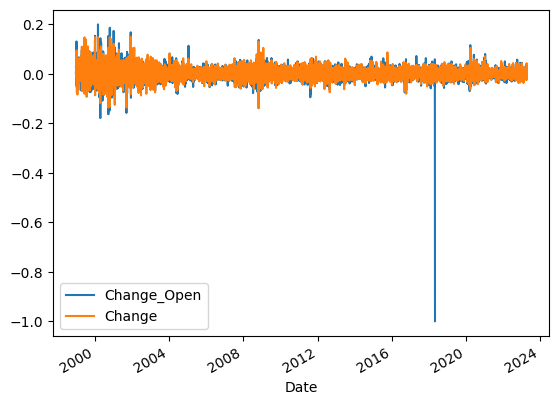

In [17]:
df[['Change_Open','Change']].plot()

# Data Pipe Line

In [18]:
# 데이터 수집
df = fdr.DataReader('005930')
# 데이터의 추가 - 데이터의 30일간의 이동평균
# 데이터의 추가 - Open 시가의 변화율

# 데이터 정제 - 결측치 처리
# 데이터 전처리

In [19]:
def pipe_line(company_code):
  df = fdr.DataReader(company_code)
  df['30avg'] = df['Close'].rolling(30).mean()
  df['Open_Change'] = df['Open']/df['Open'].shift(1)-1
  output = df
  output.plot()
  return output

,Open,High,Low,Close,Volume,Change,30avg,Open_Change
Date,,,,,,,,
1998-12-22,1509,1536,1446,1456,659030,NaN,NaN,NaN
1998-12-23,1513,1520,1482,1494,496480,0.026099,NaN,0.002651
1998-12-24,1522,1549,1488,1532,941106,0.025435,NaN,0.005948
1998-12-28,1570,1570,1503,1546,537290,0.009138,NaN,0.031537
1999-01-04,1776,1776,1624,1693,666160,0.095084,NaN,0.131210
...,...,...,...,...,...,...,...,...
2023-04-05,63700,64000,63400,63900,9176149,0.004717,61376.666667,0.004732
2023-04-06,63500,63600,62300,62300,14992747,-0.025039,61416.666667,-0.003140
2023-04-07,63800,65200,63800,65000,27476120,0.043339,61516.666667,0.004724


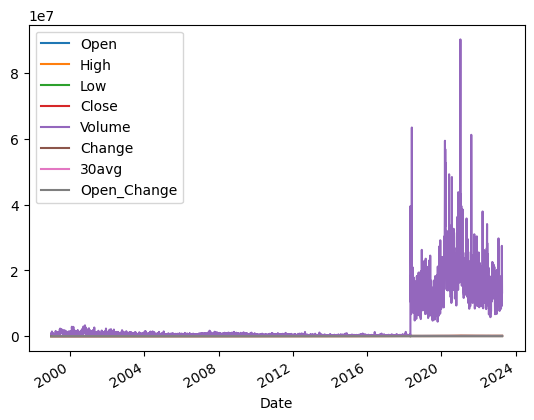

In [20]:
pipe_line('005930')

,Open,High,Low,Close,Volume,Change,30avg,Open_Change
Date,,,,,,,,
1998-12-22,13180,14162,12760,13180,964050,NaN,NaN,NaN
1998-12-23,13671,14092,13250,13741,872620,0.042564,NaN,0.037253
1998-12-24,13952,14092,13321,13741,473570,0.000000,NaN,0.020554
1998-12-28,14022,15213,13881,15003,629200,0.091842,NaN,0.005017
1999-01-04,16055,17106,15424,16194,1294250,0.079384,NaN,0.144986
...,...,...,...,...,...,...,...,...
2023-04-05,185100,187200,184000,186700,509578,0.015778,177400.000000,0.005978
2023-04-06,186900,189400,184700,185100,667512,-0.008570,177763.333333,0.009724
2023-04-07,185400,186500,184600,185100,435717,0.000000,178060.000000,-0.008026


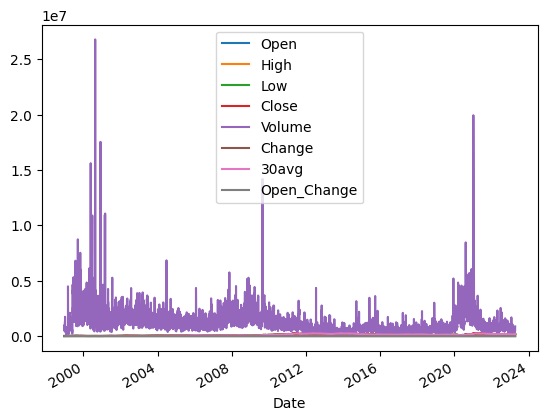

In [21]:
pipe_line('005380')

# 나의 데이터 파이프라인 구조를 만들어 보자
- 종목코드, 이동평균선 기간을 매개변수로 받는 함수
- 변화율 그래프가 출력
- Null 값은 없애기
- 종가(Close)기준 평균, 분산 등 통계 리포트 출력하도록